C:\Users\Admin\AppData\Local\Temp\ipykernel_17432\3004400160.py:31: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color=colors[i], ax=ax[i], label=f'Source {i}',


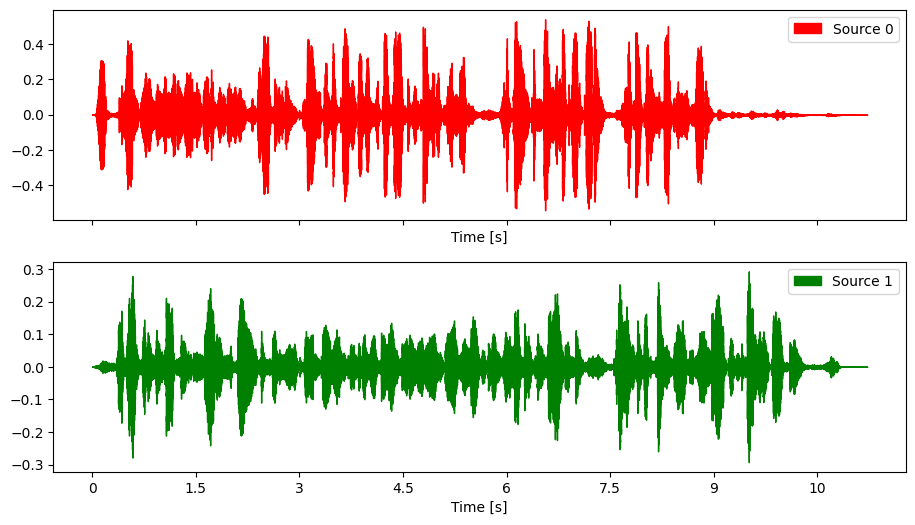

In [3]:
from mnmf import mnmf
import numpy as np
import scipy.signal as ss
from scipy.io.wavfile import write
import librosa
import matplotlib.pyplot as plt

part1, sr = librosa.load('../data/voice1.mp3')
part2, sr = librosa.load('../data/voice2.mp3')

NUM_ITER, FFT, HOP = 20, 4096, 2048

x = np.vstack([part1, part2])

n_channels, T = x.shape
n_sources = n_channels


_, _, X = ss.stft(x, nperseg = FFT, noverlap = HOP)
Y = mnmf(X, n_basis = 2, iteration = NUM_ITER)
_, y = ss.istft(Y, nperseg = FFT, noverlap = HOP)
y = y[:, :T]
for n in range(n_sources):
    write(f'../output/unmixed_{n + 1}.wav', rate = sr, data = y[n])

def plot_components(reconstructed_sounds, sr):
    n = len(reconstructed_sounds)
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots(nrows=n, ncols=1, sharex=True, figsize=(11, 3*n))
    for i in range(n):
        librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color=colors[i], ax=ax[i], label=f'Source {i}',
                                 x_axis='time')
        ax[i].set(xlabel='Time [s]')
        ax[i].legend()
plot_components(y, sr)